## **Activation Functions**


## Table of Contents:
* [Dataset](#data)
* [Training (No Activiation Functions)](#no)
* [Training (Activiation Functions)](#yes)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.6.0


<a name="data"></a>
## Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/auto-mpg.csv", na_values='?', usecols=["Horsepower","MPG"])
data = data.dropna()
data.head()

,MPG,Horsepower
0,18.0,130.0
1,15.0,165.0
2,18.0,150.0
3,16.0,150.0
4,17.0,140.0


(0.0, 50.0)

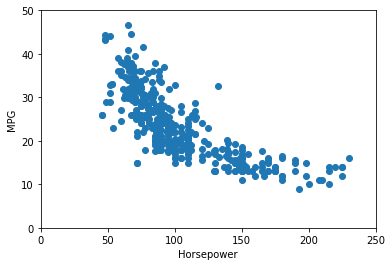

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data['Horsepower'],data['MPG'], label='Data')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.xlim(0, 250)
plt.ylim(0, 50)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['Horsepower'], data['MPG'], test_size=0.3, random_state=42)

<a name="Training"></a>
## Training

<a name="no"></a>
### No activation functions



In [ ]:
from tensorflow.keras.layers import Dense, Input, InputLayer
from tensorflow.keras import layers

model1 = tf.keras.Sequential()
model1.add(layers.BatchNormalization())
model1.add(InputLayer(input_shape=1))
model1.add(Dense(64))
model1.add(Dense(64))
model1.add(Dense(1))

In [ ]:
model1.compile(loss='mean_absolute_error', optimizer=tf.optimizers.Adam(learning_rate=0.001))

In [ ]:
model1.fit(X_train, y_train,validation_split=0.2,verbose=0, epochs=100)

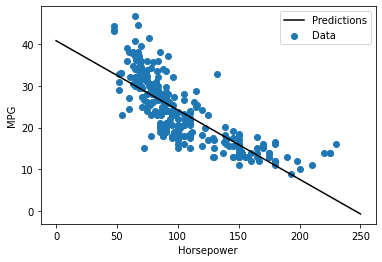

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = model1.predict(x)

plt.scatter(X_train, y_train, label='Data')
plt.plot(x, y, color='k', label='Predictions')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()

In [ ]:
# Accuracy (Root Mean Squared Error)
from sklearn.metrics import mean_squared_error
y_pred = model1.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

4.911357419872307

<a name="yes"></a>
### Activation functions

In [ ]:
model2 = tf.keras.Sequential()
model2.add(layers.BatchNormalization())
model2.add(InputLayer(input_shape=1))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(1))

In [ ]:
model2.compile(loss='mean_absolute_error', optimizer=tf.optimizers.Adam(learning_rate=0.001))

In [ ]:
model2.fit(X_train, y_train,validation_split=0.2,verbose=0, epochs=100)

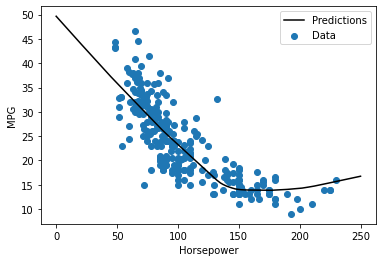

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = model2.predict(x)

plt.scatter(X_train, y_train, label='Data')
plt.plot(x, y, color='k', label='Predictions')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()

In [ ]:
# Accuracy (Root Mean Squared Error)
y_pred = model2.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

4.501719342637302